## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [2]:
!pip install pandas_datareader

  Obtaining dependency information for pandas_datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   -------------- ------------------------ 41.0/109.5 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 109.5/109.5 kB 1.6 MB/s eta 0:00:00


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

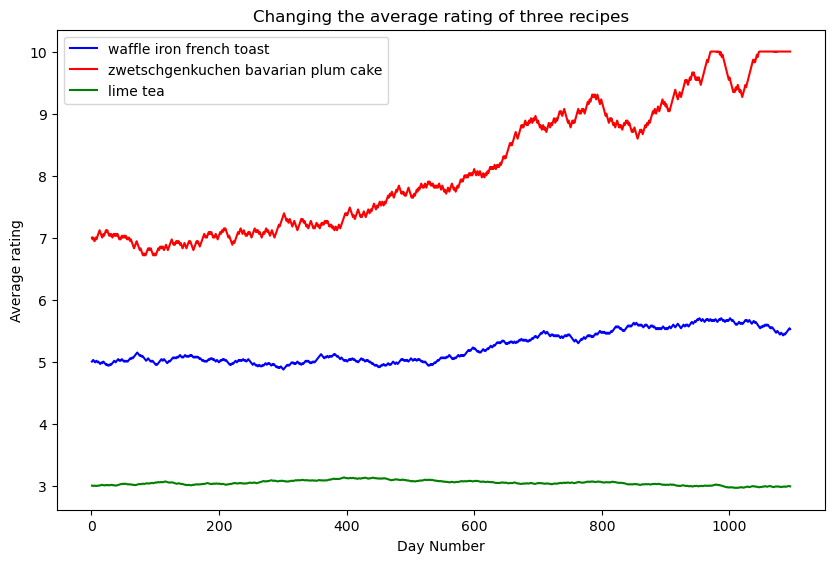

In [121]:
ratings = np.load('average_ratings.npy')
figure = plt.figure()
ax = figure.add_axes([0.1, 0.1, 1.2, 1.0])
line_waffle, = ax.plot([x for x in range(1, ratings.shape[-1] + 1, 1)]\
                      , ratings[0], 'b', label = 'waffle iron french toast')
line_cake, = ax.plot([x for x in range(1, ratings.shape[-1] + 1, 1)]\
                   , ratings[1], 'r'\
                    , label = 'zwetschgenkuchen bavarian plum cake')
line_tea, = ax.plot([x for x in range(1, ratings.shape[-1] + 1, 1)]\
                  , ratings[2], 'g', label = 'lime tea')
ax.legend(handles = [line_waffle, line_cake, line_tea]\
          , loc = 'upper left')
ax.set_xlabel('Day Number')
ax.set_ylabel('Average rating')
ax.set_title('Changing the average rating of three recipes')
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


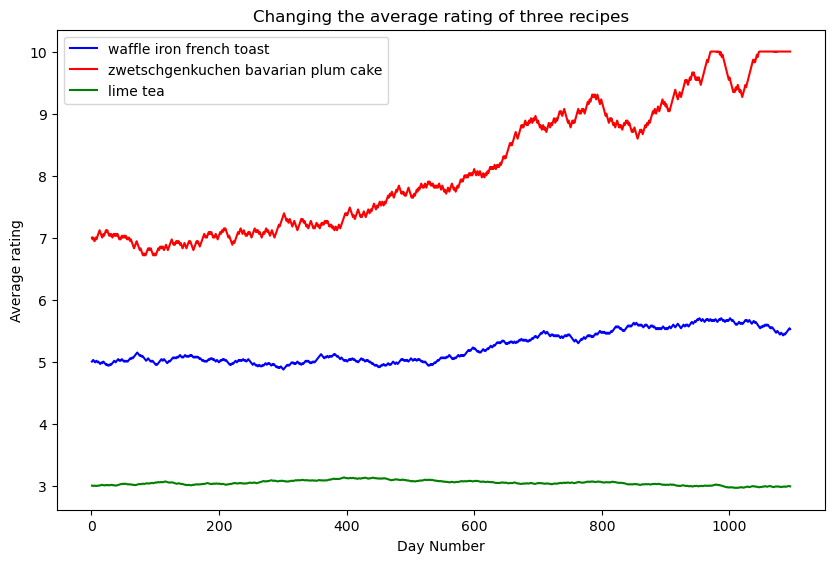

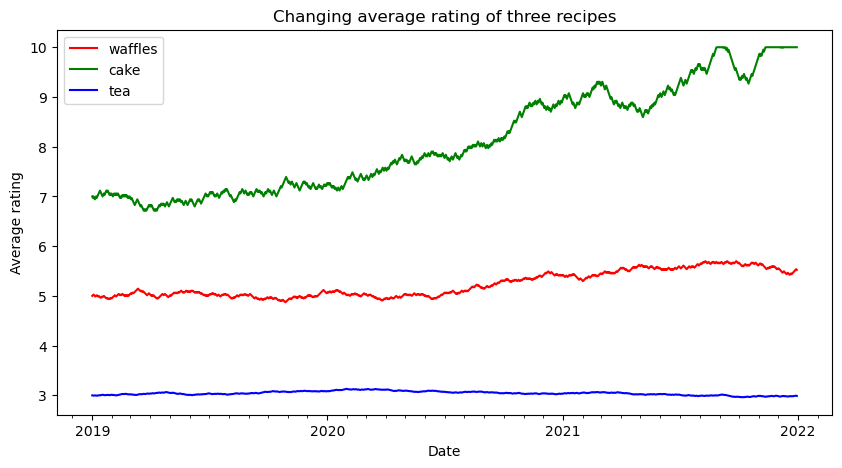

In [122]:
dates = pd.date_range(start = '2019/01/01', end = '2021/12/30')

plt.figure(figsize = (10,5))
plt.plot(dates, ratings[0], label = 'waffles', color = 'red')
plt.plot(dates, ratings[1], label = 'cake', color = 'green')
plt.plot(dates, ratings[2], label = 'tea', color = 'blue')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.xlabel('Date')
plt.ylabel('Average rating')
plt.title('Changing average rating of three recipes')

plt.legend()

figure

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

<bound method Figure.show of <Figure size 1000x600 with 3 Axes>>

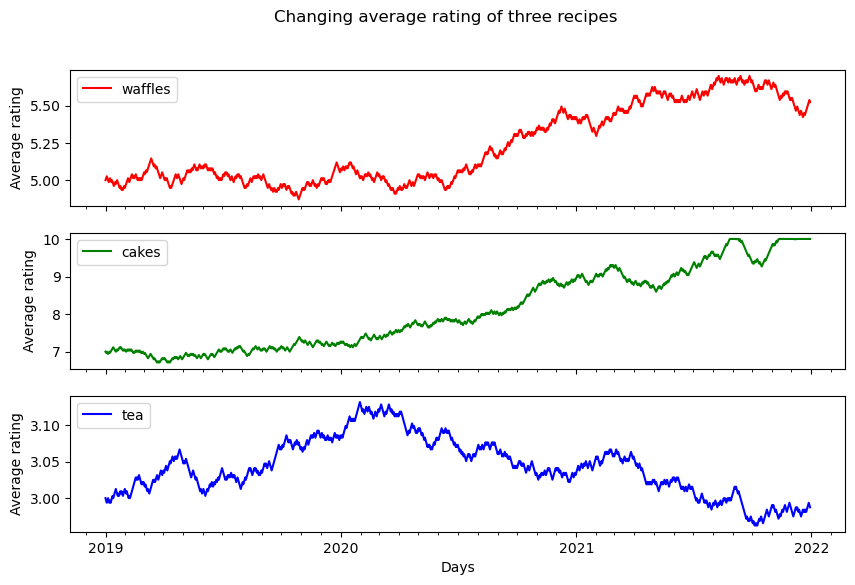

In [149]:
figure2, (axis1, axis2, axis3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 6), sharex = True)

figure2.suptitle('Changing average rating of three recipes')
figure2.gca().xaxis.set_major_locator(mdates.YearLocator())
figure2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
figure2.gca().xaxis.set_minor_locator(mdates.MonthLocator())



axis1.plot(pd.date_range('2019/01/01', '2021/12/30'), ratings[0], color = 'red', label = 'waffles')
axis1.set_ylabel('Average rating')
axis1.legend(loc = 'upper left')

axis2.plot(pd.date_range('2019/01/01', '2021/12/30'), ratings[1], color = 'green', label = 'cakes')
axis2.set_ylabel('Average rating')
axis2.legend(loc = 'upper left')

axis3.plot(pd.date_range('2019/01/01', '2021/12/30'), ratings[2], color = 'blue', label = 'tea')
axis3.set_xlabel('Days')
axis3.set_ylabel('Average rating')
axis3.legend(loc = 'upper left')


figure2.show

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


<bound method Figure.show of <Figure size 1000x500 with 2 Axes>>

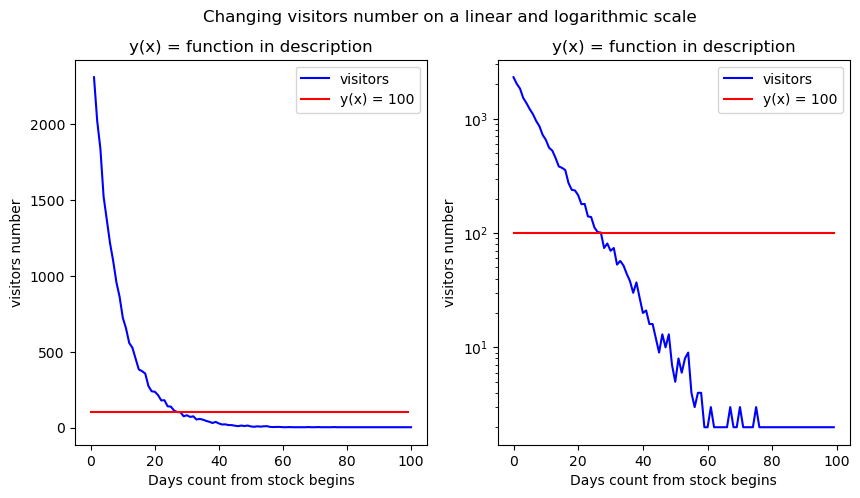

In [171]:
visitors = np.load('visitors.npy')

figure3, (axis1, axis2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
figure3.suptitle('Changing visitors number on a linear and logarithmic scale')

axis1.plot([x for x in range(1, 101)], visitors, color = 'blue', label = 'visitors')
axis1.plot([100 for _ in range(100)], color = 'red', label = 'y(x) = 100')
axis1.set_ylabel('visitors number')
axis1.set_xlabel('Days count from stock begins')
axis1.set_title('y(x) = function in description')
axis1.legend(loc = 'upper right')

axis2.set_yscale('log')
axis2.plot(visitors, color = 'blue', label = 'visitors')
axis2.plot([100 for _ in range(100)], color = 'red', label = 'y(x) = 100')
axis2.set_xlabel('Days count from stock begins')
axis2.set_ylabel('visitors number')
axis2.set_title('y(x) = function in description')
axis2.legend(loc = 'upper right')


figure3.show

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [146]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"